In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, PrecisionRecallDisplay

from sklearn import tree

## Precision Recall Curve plot

In [ ]:
x,y = load_iris(return_X_y=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x[y < 2],y[y < 2], test_size=0.5, random_state=0)

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(x_train, y_train)

In [ ]:
THRESHOLD = 0.6

preds_proba = model.predict_proba(x_test)
preds = (preds_proba[:,1] >= THRESHOLD).astype('int')

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, preds_proba[:,1])

In [ ]:
fig, ax = plt.subplots(figsize=(6,6), dpi=100)

PrecisionRecallDisplay.from_predictions(y_test, preds_proba[:,1], ax=ax, name="")

ax.set_xticks(np.arange(0,1.1,0.1))
ax.set_yticks(np.arange(0,1.1,0.1))
plt.show()

## IOU plot

In [2]:
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from IPython.display import display

In [3]:
import random
random.randint(0,1)

1

In [4]:
IMG_PATH = "../data/imagenes_diagramas/ERDiagramsMySQL-14.png"

In [5]:
inputImage = cv2.imread(IMG_PATH)
inputImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB)

In [6]:
ELEMENT_TO_TRAIN="diagramas"
PATH = 'C:\\Users\\Diego\\Desktop\\TFI-Cazcarra'
TRAIN_CSV = f"{PATH}/data/csv/train_{ELEMENT_TO_TRAIN}.csv"
TEST_CSV = f"{PATH}/data/csv/test_{ELEMENT_TO_TRAIN}.csv"
VAL_CSV = f"{PATH}/data/csv/val_{ELEMENT_TO_TRAIN}.csv"

In [7]:
train = pd.read_csv(TRAIN_CSV)
test = pd.read_csv(TEST_CSV)
val = pd.read_csv(VAL_CSV)

In [8]:
df = train[train["image_path"].str.contains(IMG_PATH.split("/")[-1])]

In [100]:
random.sample(["a","b","c"], k=1)

['b']

In [114]:
def print_pred(row, img, color=(0,255,0), thickness=2, text_color=(0,0,0)):
    cv2.rectangle(img, (row["xmin"], row["ymin"]), (row["xmax"], row["ymax"]), color, thickness)
    
    label = row['label']
    (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    
    cv2.putText(img, label, (row["xmin"], row["ymin"]),cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 1)
    
    return img

def disturbe_row(row, all_classes, disturbe_class, threshold = 30):
    if disturbe_class:
        row['label'] = random.sample(list(all_classes), k=1)[0]
    row['xmin'] += random.randint(0,threshold)
    row['xmax'] += random.randint(0,threshold)
    row['ymin'] += random.randint(0,threshold)
    row['ymax'] += random.randint(0,threshold)
    return row

In [125]:
imgs = []
for i_num in range(3):
    input_image = cv2.imread(IMG_PATH)
    input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
#     original_bboxes = []

    for i, row in df.iterrows():
        if i_num == 0 and random.randint(0,1) > 0.7:
            print_pred(row=row, img=input_image)
        if i_num == 1:
            print_pred(row=row, img=input_image)
            if random.randint(0,1) > 0.6:
                disturbed = disturbe_row(row=row, all_classes=df['label'].unique(), disturbe_class=True)
                print_pred(row=disturbed, img=input_image)
            if random.randint(0,1) > 0.8:    
                disturbed = disturbe_row(row=row, all_classes=df['label'].unique(), disturbe_class=False, threshold=15)
                print_pred(row=disturbed, img=input_image)
        if i_num==2:
            print_pred(row=row, img=input_image)
    imgs.append(input_image[:280, :340])

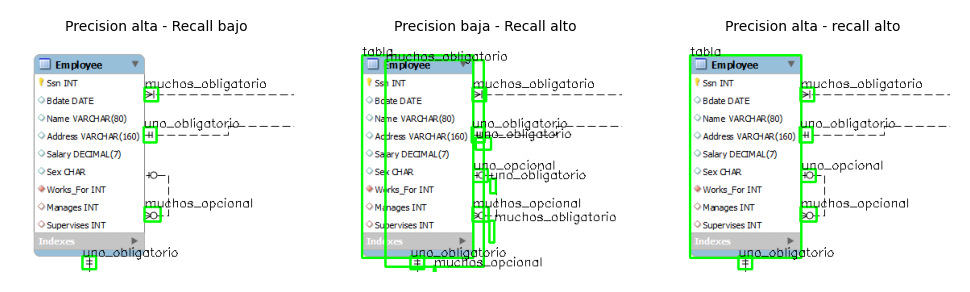

In [126]:
fig, ax = plt.subplots(1,3, figsize=(6,6), dpi=200)

titles = ["Precision alta - Recall bajo", "Precision baja - Recall alto", "Precision alta - recall alto"]

for i in range(3):   
    ax[i].imshow(imgs[i])
    ax[i].set_title(titles[i], fontsize=5)
    ax[i].axis('off')
plt.show()

In [ ]:
fig, ax = plt.subplots(3, figsize=(6,6), dpi=100)

PrecisionRecallDisplay.from_predictions(y_test, preds_proba[:,1], ax=ax, name="")

ax.set_xticks(np.arange(0,1.1,0.1))
ax.set_yticks(np.arange(0,1.1,0.1))
plt.show()